In [7]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sb

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
cmap = cm.coolwarm

import math
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeCV
from scipy.optimize import minimize
%load_ext autoreload
%autoreload 2

from matplotlib.colors import LogNorm
import matplotlib as mpl

from functions_for_figures import Fig2A_sim, Fig2A_plot, Fig2B_sim, Fig2B_plot, Fig3A_sim, Fig3A_plot, Fig3B_plot, Fig3C_sim, Fig3C_plot
from simulate_response import simulate_response
from convergence import FLD_perf


sigma_thresh = 0.0001

plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 
sb.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":14})  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
Nsim = 2

running: simulations/test
sigma is  [ 0.1         0.1274275   0.16237767  0.20691381  0.26366509  0.33598183
  0.42813324  0.54555948  0.6951928   0.88586679  1.12883789  1.43844989
  1.83298071  2.33572147  2.97635144  3.79269019  4.83293024  6.15848211
  7.8475997  10.        ]
saved itself after iteration 0
saved itself after iteration 1


/Users/carolinehaimerl/Google Drive/1 Science/papers/data paper/NatureComm/final/code/Fig3/functions_for_figures.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SIM.DECODER.relsigma[SIM.DECODER.sigma == sigma[ss]] = relsigma[sigma[ss]]


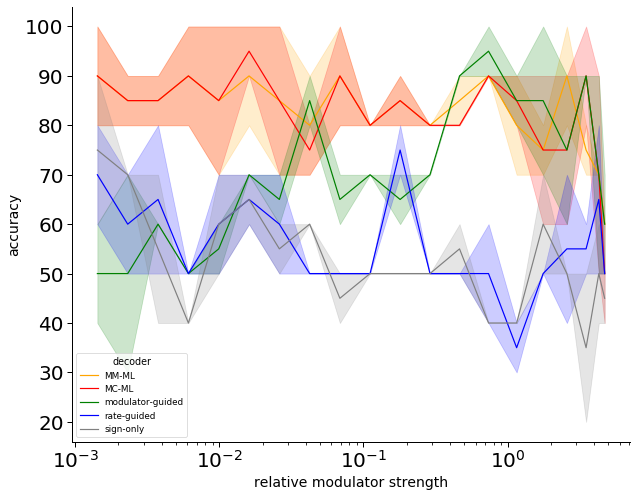

In [3]:
Fig3_file = 'simulations/test' # Fig3_sim
Fig3A_sim(path='', name=Fig3_file, Nsim=Nsim, Nsimseed=0)
Fig3A_plot(name = Fig3_file,
           savefig=False, relsigmause=True, thresh_sigm=sigma_thresh)

doing sigma=0.1
doing sigma=0.12742749857031338
doing sigma=0.16237767391887217
doing sigma=0.20691380811147897
doing sigma=0.26366508987303583
doing sigma=0.33598182862837817
doing sigma=0.42813323987193935
doing sigma=0.5455594781168519
doing sigma=0.6951927961775606
doing sigma=0.8858667904100825
doing sigma=1.1288378916846888
doing sigma=1.438449888287663
doing sigma=1.8329807108324356
doing sigma=2.3357214690901213
doing sigma=2.9763514416313175
doing sigma=3.79269019073225
doing sigma=4.832930238571752
doing sigma=6.158482110660261
doing sigma=7.847599703514611
doing sigma=10.0
exp bound hit, times 20


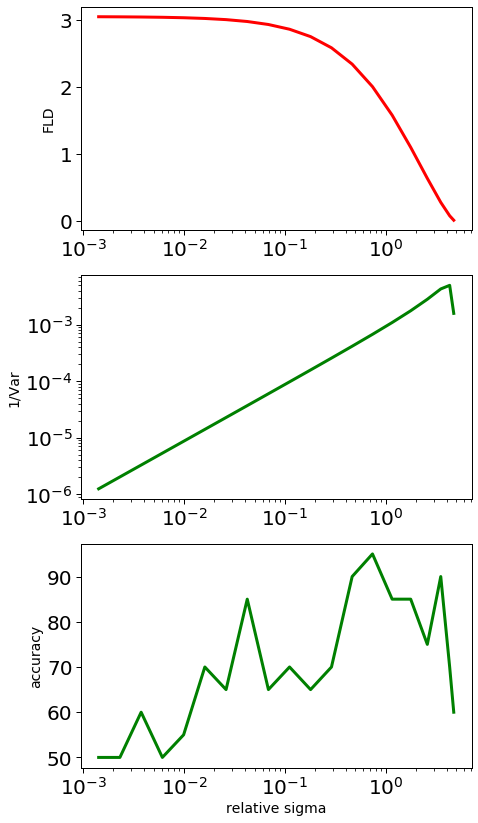

In [4]:
fig, ax, fig2, ax2 = Fig3B_plot(name = Fig3_file,
                                savefig=False, Nsim=1, thresh_sigm=sigma_thresh)

## w noisy

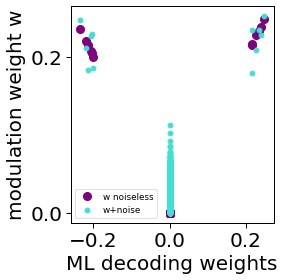

In [5]:

D = 1000 
Nact = 50
Ninf = 6 # for total of 12 informative neurons
sig_m = 1 
T=10000
up=1.05
down=.95 
sig_base = .5
offset_base= 2 

POP = simulate_response()
POP.par(D, T, sig_m, 0, up, down,
        sig_base, offset_base, Ninf, Ninact = D-Nact, seed = 1,
        m_dim=1)
POP.create_population(w_nois=0)
# visualize

plt.figure(figsize=(4,4))
plt.plot(POP.dec, POP.w, 'o', label='w noiseless', color='purple', markersize=8)
POP.create_population(w_nois=.03)
plt.plot(POP.dec, POP.w, 'o', label='w+noise', color='turquoise')
plt.xticks([-.2, 0, .2], fontsize=20)
plt.yticks([0, .2], fontsize=20)
plt.legend()
plt.xlabel('ML decoding weights', fontsize=20)
plt.ylabel('modulation weight w', fontsize=20)
plt.tight_layout()


running: simulations/test2
sigma is  [ 0.1         0.1274275   0.16237767  0.20691381  0.26366509  0.33598183
  0.42813324  0.54555948  0.6951928   0.88586679  1.12883789  1.43844989
  1.83298071  2.33572147  2.97635144  3.79269019  4.83293024  6.15848211
  7.8475997  10.        ]
saved itself after iteration 0
exp bound hit, times 8
saved itself after iteration 1


/Users/carolinehaimerl/Google Drive/1 Science/papers/data paper/NatureComm/final/code/Fig3/functions_for_figures.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SIM.DECODER.relsigma[SIM.DECODER.sigma == sigma[ss]] = relsigma[sigma[ss]]


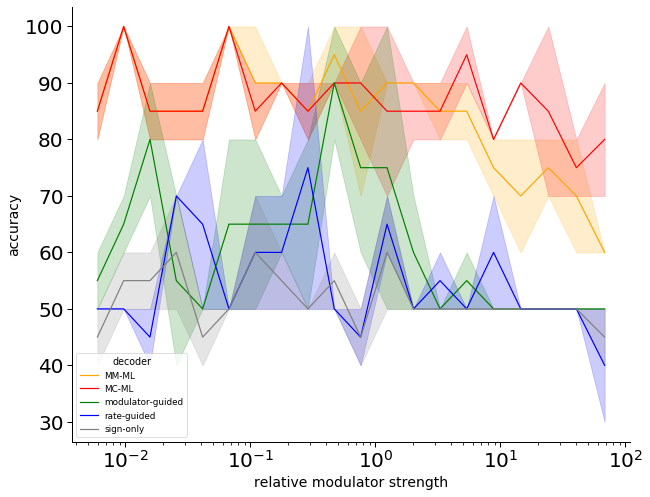

In [10]:
Fig3_file_wnoise = 'simulations/test2' #Fig_3_sim_June20_wnois03'
Fig3A_sim(path='', name=Fig3_file_wnoise, Nsim=Nsim, Nsimseed=0, w_nois=.03)
Fig3A_plot(name = Fig3_file_wnoise,
           savefig=False, relsigmause=True, thresh_sigm=sigma_thresh)

## w untargeted

In [12]:

D = 100 
Nact = 50
Ninf = 6 # for total of 12 informative neurons
T=10000
up=1.05
down=.95 
sig_base = .5
offset_base= 2 
beta = 0
sigma = np.logspace(-1,1,20)
ustim = np.array([1,4])
s = np.tile(ustim, np.int(T/2))


Nsim_tmp = 2
PERFFLD = np.zeros([Nsim_tmp, len(sigma), 2])
for ss in range(len(sigma)):
    print('doing sigma='+np.str(sigma[ss]))
    if sigma[ss]==0:
        continue
    
    for nnsim in range(Nsim_tmp):
        POP = simulate_response()
        POP.par(D, T, sigma[ss], 0, up, down,
                sig_base, offset_base, Ninf, Ninact = D-Nact, seed = nnsim,
                m_dim=1)
        POP.create_population()

        PERFFLD[nnsim, ss,0] = FLD_perf(POP.dec, sigma[ss], np.array([POP.m1, POP.m2]), 
                                       POP.w, POP.D, meanout=True)
        PERFFLD[nnsim, ss,1] = FLD_perf(POP.dec, sigma[ss], np.array([POP.m1, POP.m2]), 
                                       np.random.choice(POP.w, D, replace=False), 
                                        POP.D, meanout=True)

doing sigma=0.1
doing sigma=0.12742749857031338
doing sigma=0.16237767391887217
doing sigma=0.20691380811147897
doing sigma=0.26366508987303583
doing sigma=0.33598182862837817
doing sigma=0.42813323987193935
doing sigma=0.5455594781168519
doing sigma=0.6951927961775606
doing sigma=0.8858667904100825
doing sigma=1.1288378916846888
doing sigma=1.438449888287663
doing sigma=1.8329807108324356
doing sigma=2.3357214690901213
doing sigma=2.9763514416313175
doing sigma=3.79269019073225
doing sigma=4.832930238571752
doing sigma=6.158482110660261
doing sigma=7.847599703514611
doing sigma=10.0


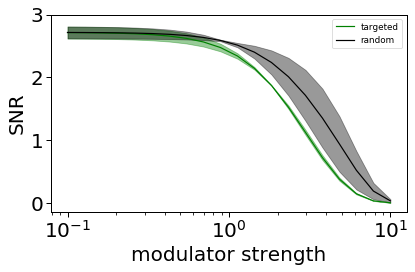

In [13]:
color = ['green', 'black']
label=['targeted', 'random']
plt.figure()
for ww in range(2):
    plt.fill_between(sigma, np.mean(PERFFLD[:,:,ww],axis=0)-np.sqrt(np.var(PERFFLD[:,:,ww],axis=0)),
                     np.mean(PERFFLD[:,:,ww],axis=0)+np.sqrt(np.var(PERFFLD[:,:,ww],axis=0)), 
                     alpha=.4, color=color[ww])
    plt.plot(sigma, np.mean(PERFFLD[:,:,ww],axis=0), color=color[ww], label=label[ww])
plt.xscale('log')
plt.xticks([.1,1,10], fontsize=20)
plt.yticks([0, 1,2,3], fontsize=20)
plt.legend()
plt.xlabel('modulator strength', fontsize=20)
plt.ylabel('SNR', fontsize=20)
plt.tight_layout()


## multiunits

running: simulations/test3
sigma is  [ 0.1         0.1274275   0.16237767  0.20691381  0.26366509  0.33598183
  0.42813324  0.54555948  0.6951928   0.88586679  1.12883789  1.43844989
  1.83298071  2.33572147  2.97635144  3.79269019  4.83293024  6.15848211
  7.8475997  10.        ]
saved itself after iteration 0
saved itself after iteration 1


/Users/carolinehaimerl/Google Drive/1 Science/papers/data paper/NatureComm/final/code/Fig3/functions_for_figures.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SIM.DECODER.relsigma[SIM.DECODER.sigma == sigma[ss]] = relsigma[sigma[ss]]


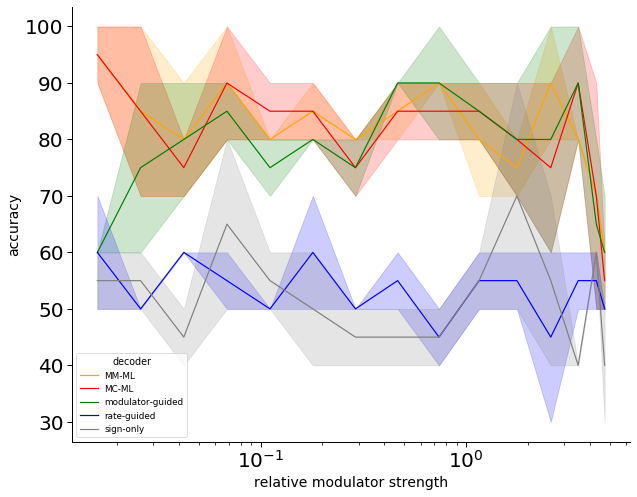

In [14]:
Fig3_file_multiunit = 'simulations/test3' #test_nois'
Fig3A_sim(path='', name=Fig3_file_multiunit, Nsim=Nsim, Nsimseed=0, w_nois=0, sigm_add=0, m_dim=1, 
          multiunit = True,
         D = np.array([4950]))
Fig3A_plot(name = Fig3_file_multiunit,
           savefig=False, relsigmause=True, thresh_sigm=sigma_thresh*100)

# ratio informative/uninformative

running: simulations/test4
saved itself after iteration 0
saved itself after iteration 1


/Users/carolinehaimerl/Google Drive/1 Science/papers/data paper/NatureComm/final/code/Fig3/functions_for_figures.py:309: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ci=95, palette=my_cols, markers=True)


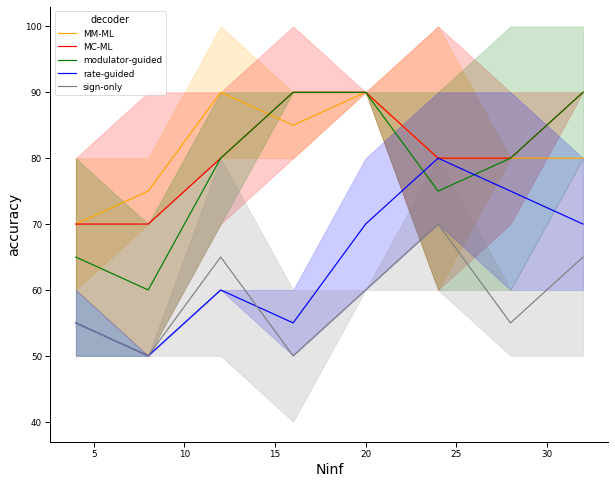

In [15]:
Fig3C_file = 'simulations/test4' #vary_inf_uninf'
Fig3C_sim(path='', name = Fig3C_file, Nsim=Nsim, Nsimseed=0)
Fig3C_plot(SIM=None, name=Fig3C_file, savefig=False)

# learn signs

running: simulations/test5
saved itself after iteration 0
saved itself after iteration 1


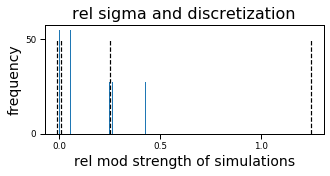

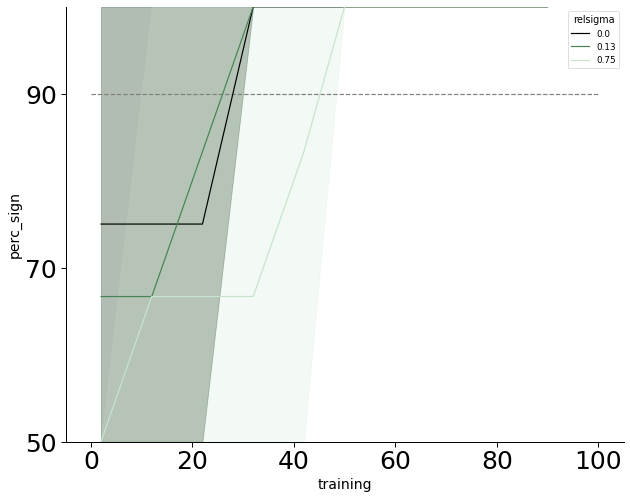

In [16]:
Fig2A_file = 'simulations/test5' #sign_learning'
Fig2A_sim(path='', name = Fig2A_file, Nsim=Nsim, Nsimseed=0, SIGM = np.array([.01, .7, 1.5, 2]), 
          Ninf = np.array([1]), D = np.array([2]))
Fig2A_plot(name=Fig2A_file, savefig=False, relsigma=True)
